In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [26]:
dados = pd.read_csv('dados/aluguel_amostra.csv', sep=';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


<AxesSubplot:>

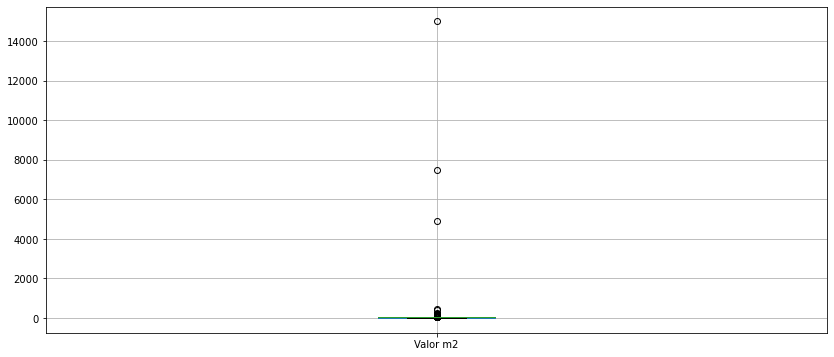

In [7]:
valor_m2 = dados['Valor m2']
#plt.boxplot(valor_m2)
#dados.boxplot(['Valor m2'])

In [16]:
Q1 = valor_m2.quantile(.25).round(2)
Q3 = valor_m2.quantile(.75).round(2)
IIQ = (Q3 - Q1).round(2)
limite_inferior = (Q1 - 1.5*IIQ).round(2)
limite_superior = (Q3 + 1.5*IIQ).round(2)

In [17]:
[Q1,Q3,IIQ,limite_inferior,limite_superior]

[21.25, 42.31, 21.06, -10.34, 73.9]

In [22]:
dados[(valor_m2 >= limite_superior) | (valor_m2 <= limite_inferior)]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
24,Apartamento,Ipanema,2,1,1,85,6500.0,750.0,200.0,76.47,Apartamento
29,Apartamento,Ipanema,4,3,4,500,38000.0,9500.0,2166.0,76.00,Apartamento
55,Apartamento,Lagoa,4,3,4,190,24900.0,3710.0,0.0,131.05,Apartamento
66,Apartamento,Botafogo,1,1,0,40,2990.0,1020.0,183.0,74.75,Apartamento
92,Apartamento,Ipanema,2,1,1,140,11000.0,1760.0,315.0,78.57,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9924,Apartamento,Copacabana,3,2,1,300,25000.0,2700.0,1400.0,83.33,Apartamento
9952,Apartamento,Ipanema,1,1,1,105,10000.0,2900.0,700.0,95.24,Apartamento
9980,Apartamento,Ipanema,4,3,4,175,25000.0,3750.0,1200.0,142.86,Apartamento
9989,Quitinete,Ipanema,1,0,0,25,2000.0,433.0,61.0,80.00,Apartamento


In [27]:
dados_new = dados[(valor_m2 <= limite_superior) & (valor_m2 >= limite_inferior)]
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9994,Apartamento,Leblon,2,1,2,150,8000.0,1160.0,500.0,53.33,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


<AxesSubplot:>

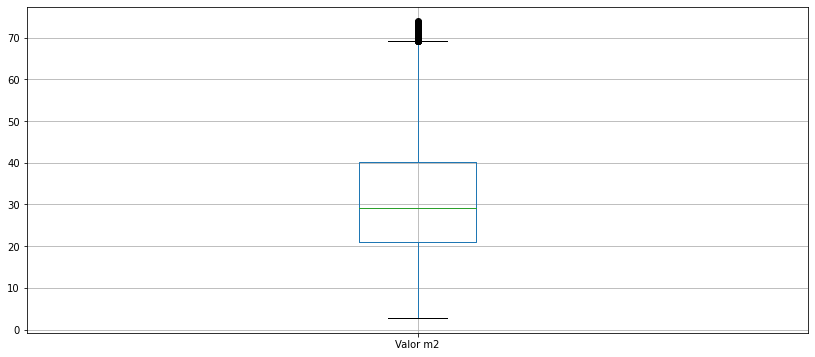

In [28]:
dados_new.boxplot(['Valor m2'])

array([[<AxesSubplot:title={'center':'Valor m2'}>]], dtype=object)

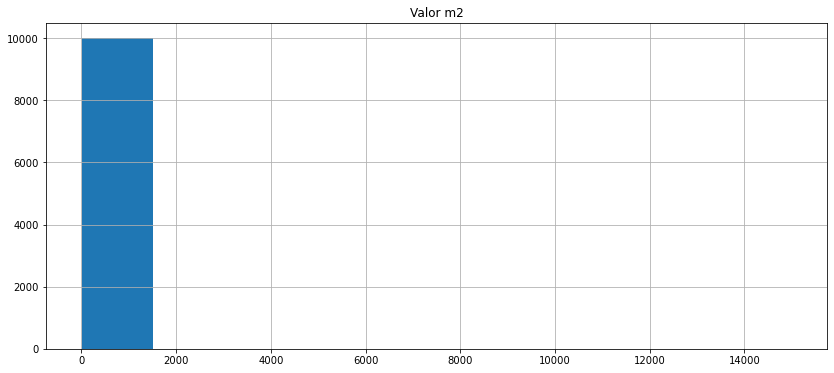

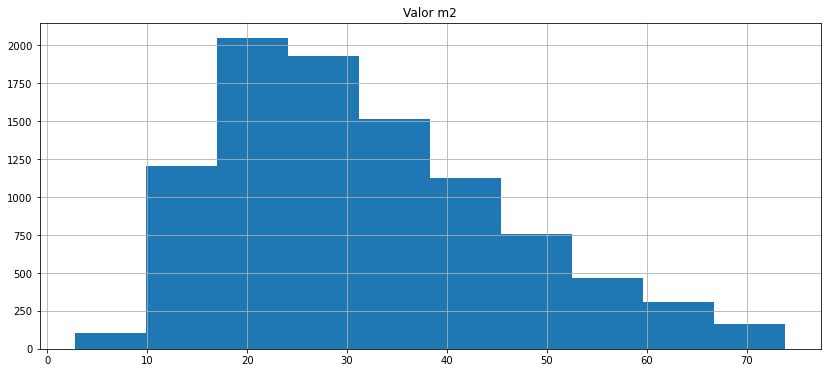

In [33]:
dados.hist(['Valor m2'])
dados_new.hist(['Valor m2'])